In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CLEANED data from Notebook 01
df = pd.read_csv('../data/cleaned_churn_data.csv')

# Verify quickly that it's clean
print(df.shape)
df.head()

(223966, 12)


,customer_id,gender,age,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,province,provider_nepal
0,2,F,55,2020-01-01,2,130556,62,39,5973,0,Karnali,Ncell
1,3,F,57,2020-01-01,0,148828,49,24,193,1,Koshi,Nepal Telecom (NTC)
2,4,M,46,2020-01-01,1,38722,80,25,9377,1,Bagmati,Nepal Telecom (NTC)
3,5,F,26,2020-01-01,2,55098,78,15,1393,0,Gandaki,Nepal Telecom (NTC)
4,6,M,36,2020-01-01,1,73452,91,24,8109,0,Sudurpashchim,Nepal Telecom (NTC)


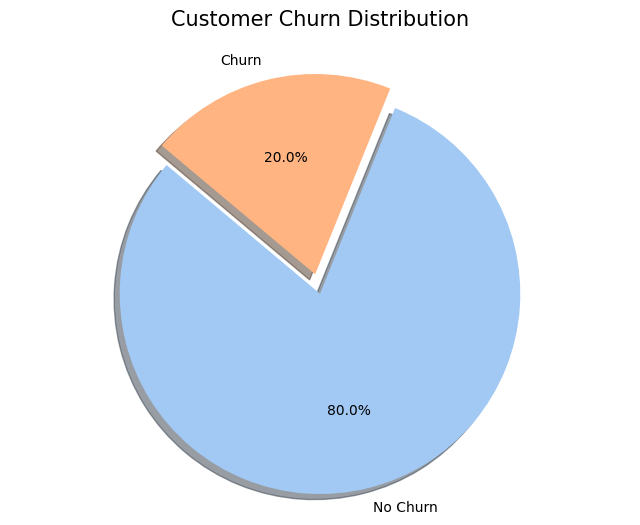

In [2]:
# 1. Get the actual counts of Churn (1) vs No Churn (0)
counts = df['churn'].value_counts()

# 2. Define labels and colors
# value_counts normally returns 0 first, then 1, so the order is [No Churn, Churn]
labels = ['No Churn', 'Churn']
colors = sns.color_palette('pastel')[0:2]

# 3. Create the Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(
    counts, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%',   # This adds the percentage automatically
    startangle=140,      # Tilts the pie for better look
    shadow=True,         # Adds a professional 3D effect
    explode=(0, 0.1)     # "Pulls out" the Churn slice to make it stand out
)

plt.title('Customer Churn Distribution', fontsize=15, pad=20)
plt.axis('equal') # Ensures the pie is a circle
plt.show()

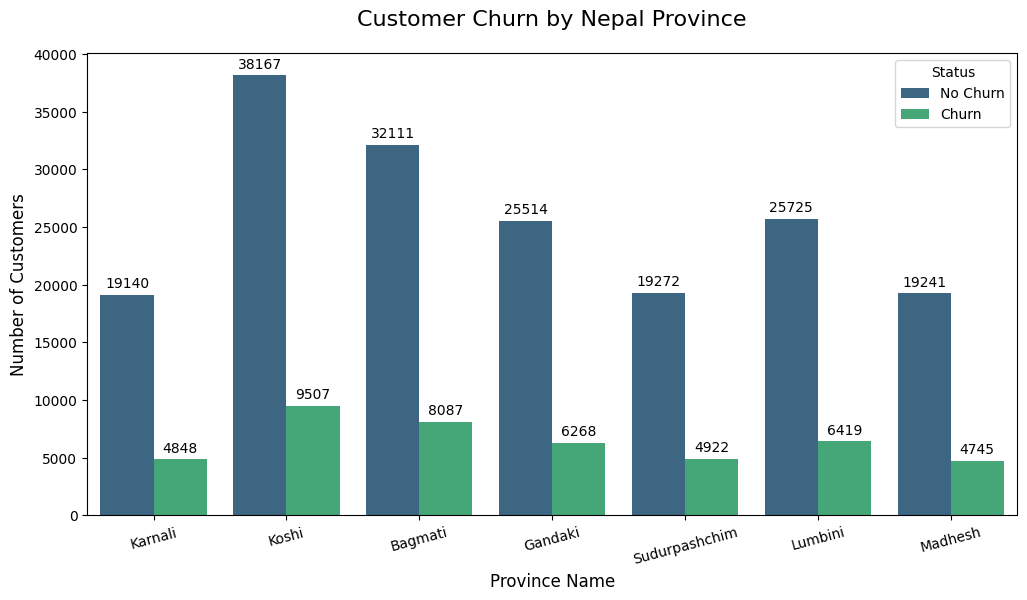

In [11]:
plt.figure(figsize=(12, 6))

# Use countplot for categorical vs categorical analysis
ax = sns.countplot(data=df, x='province', hue='churn', palette='viridis')

# Adding labels for clarity
plt.title('Customer Churn by Nepal Province', fontsize=16, pad=20)
plt.xlabel('Province Name', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Status', labels=['No Churn', 'Churn'])

# Rotate x-labels if they overlap
plt.xticks(rotation=15)

# Optional: Add data labels on top of bars
for container in ax.containers:
    ax.bar_label(container, padding=3)


plt.show()

In [20]:
def kde_plt(col):
    sns.kdeplot(
    data=df, x='col', hue="churn",
    cumulative=True, common_norm=False, common_grid=True,
    )

kde_plt(df.sms_sent)

ValueError: Could not interpret value `col` for `x`. An entry with this name does not appear in `data`.

In [6]:
counts1 = df['province'].value_counts()
labels = ['Koshi', 'Bagmati','Lumbini', 'Gandaki', 'Sudurpashchim','Karnali', 'Madhesh']
sns.barplot(df, x=counts, y=labels, hue="churn")

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 223966 and the vector passed to `y` has length 7.